# Project: Wrangling and Analyze Data

## Dataset Description
- TAE represents the 'twitter-archive-enhanced.csv' file
- image represents the 'image-predictions.tsv' file
- tweet represents the 'tweet-json' file

## Data Gathering

In [1]:
#First, importing the modules to be used for accessing the data
import json
import numpy as np
import pandas as pd
import requests
import tweepy

In [2]:
#Loading the twitter achive enhaced file
TAE = pd.read_csv('twitter-archive-enhanced.csv')
TAE.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#importing the request module
import requests

In [4]:
#Defining the website url as "url"
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [5]:
#Defining the request code as response 
response = requests.get(url)

In [6]:
#Importing the data gotten from the request into a new file named 'image'
with open('image.tsv', 'wb') as file:
    file.write(response.content)

In [7]:
#Reading the image document with a tab separator
image = pd.read_csv('image.tsv', sep='\t')
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
#importing modules to be used for getting the tweet_ids from twitter API
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [9]:
##### Querying the API #####

# consumer_key = ''
# consumer_secret = ''
# access_token = ''
# access_secret = ''

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

In [10]:
# with open ('tweet_json.txt', 'w') as json_file:
#     for tweet_id in tweet_id_lists:
#         try:
#             status = api.get_status(tweet_id)
#             json.dump(status._json, json_file)
#             json_file.write('\n')
#         except Exception as e:
#             pass

In [11]:
#Defining the tweet_id values as 'tweet_ids'
tweet_ids = TAE.tweet_id.values
#Checking the number of tweet_ids that was imported from the TAE file for confirmation
len(tweet_ids)

2356

In [12]:
#Checking for the tweet_id samples
TAE.tweet_id.head(5)

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

In [13]:
#Checking for only the tweet_ids
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149])

**Since I was not granted access to the twitter's api, I will read the tweet_json.txt file whose content is in json format, into a dataframe**

In [14]:
#Creating an empty file to import the "tweet-json.txt" data into
tweets = []
with open('tweet-json.txt') as file:
 # a for loop is needed to read the contents of the file one after the other
    for line in file:
        m = json.loads(line)# the loads method help in converting the txt file content in json format to a python dictionary
#Renaming the 'tweet_id', 'retweet_count' and 'favorite_count' columns
        tweets.append({'tweet_id': m['id'],
                       'retweet_count': m['retweet_count'],
                       'favorite_count': m['favorite_count']})


In [15]:
#Defining the tweets file and reading it
tweet = pd.DataFrame(tweets)
tweet.head

<bound method NDFrame.head of       favorite_count  retweet_count            tweet_id
0              39467           8853  892420643555336193
1              33819           6514  892177421306343426
2              25461           4328  891815181378084864
3              42908           8964  891689557279858688
4              41048           9774  891327558926688256
5              20562           3261  891087950875897856
6              12041           2158  890971913173991426
7              56848          16716  890729181411237888
8              28226           4429  890609185150312448
9              32467           7711  890240255349198849
10             31166           7624  890006608113172480
11             28268           5156  889880896479866881
12             38818           8538  889665388333682689
13             27672           4735  889638837579907072
14             15359           2321  889531135344209921
15             25652           5637  889278841981685760
16             296

## Assessing Data
- Doing Visual Assessment for all our extracted data

- TAE visualization assessment

In [16]:
#Viewing the first 5 rows in the TAe datafile
TAE.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
#Viewing the information in the TAE datafile
TAE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
#Checking for the overall description of the dataset
TAE.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
#Checking for any duplicated entry in the datafile
TAE.duplicated().sum()

0

In [20]:
#Checking for any duplicated value for the tweet_id in the TAE datafile
TAE['tweet_id'].duplicated().sum()

0

- image visualization assessment

In [21]:
#Viewing then first 5 rows of the image datafile
image.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
#Checking for the info
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
#Checking for the description
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
#Checking for any duplicated values
image.duplicated().sum()

0

In [25]:
#Checking for any duplicates in the tweet_id column 
image['tweet_id'].duplicated().sum()

0

- tweet visualisation assessment

In [26]:
#Viewing the firt 5 rows of the dataset
tweet.head(5)

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [27]:
#Checking for the info
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [28]:
#Checking for the description of the tweet file
tweet.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


In [29]:
#Checking for any duplicates in the data
tweet.duplicated().sum()

0

In [30]:
#Checking for any duplicates in the tweet_id column
tweet['tweet_id'].duplicated().sum()

0

### Quality issues
##### *twitter_archive* (TAE)
1. Timestamp column should be changed datetime
2. Source column should be cleaned to make it more straightforward
3. Tweets without image urls should be dropped, keeping only the original tweets with images
4. Retweets (tweets with retweeted_status_id populated) should be dropped
5. Some names are not in tweet and some entries are incorrect, any name not in proper case should be NaN as unavailable
6. "None" string values in dataframe should be NaN to indicate the values that are not available

##### *image_predictions* (image)
7. Remove underscores and proper case image descriptions

##### *tweet_json* (tweet)
8. Remove duplicate data

### Tidiness issues
1. Combining the columns doggo, puppo, pupper, floofer into a single column.
2. Merge to be done from image data to get dog breed(with single value for breed) and tweet data to get retweet_count, favorite_count, and is_quote_status into TAE 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [31]:
# Make copies of original pieces of data
TAE_clean = TAE.copy()
image_clean = image.copy()
tweet_clean = tweet.copy()

### Issue 1: Timestamp column should be changed to datetime

#### Define: Timestamp column should be changed to datetime

#### Code

In [32]:
#Changing the time stamp to datetime
TAE_clean['timestamp'] = pd.to_datetime(TAE_clean['timestamp'])

#### Test

In [33]:
#Checing to see if corrections have been made
TAE_clean['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### Issue #2: Source column should be cleaned to make it more straightforward

#### Define: Clean up source column to make it straightforward

#### Code

In [34]:
#Checking for the source valuecounts
TAE_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [35]:
#Using the replace function to replace the urls with clear words to make the work neat
TAE_clean['source'] = TAE_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
TAE_clean['source'] = TAE_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene')
TAE_clean['source'] = TAE_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
TAE_clean['source'] = TAE_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

#### Test

In [36]:
#Testing to see if the corrections have been made correctly
TAE_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue 3: Tweets without image urls should be dropped, keeping only the original tweets with images

#### Define: Tweets without expanded_urls (no images) should be dropped, keeping only original tweets with images

#### Code:

In [37]:
TAE_clean = TAE_clean[~TAE_clean['expanded_urls'].isnull()]

#### Test

In [38]:
TAE_clean[TAE_clean['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue 4: Retweets (tweets with retweeted_status_id populated) should be dropped

#### Define: Retweets (tweets with retweeted_status_id populated) should be dropped

#### Code

In [39]:
TAE_clean = TAE_clean[~TAE_clean['retweeted_status_id'].isnull()]

#### Test

In [40]:
TAE_clean[~TAE_clean['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36,Twitter for iPhone,RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48,Twitter for iPhone,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06,Twitter for iPhone,RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58,Twitter for iPhone,RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53,Twitter for iPhone,RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33,Twitter for iPhone,RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23,Twitter for iPhone,RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41,Twitter for iPhone,RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14,Twitter for iPhone,RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19,Twitter for iPhone,RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


### Issue 5: Some names are not in tweet and some entries are incorrect, any name not in proper case should be NaN as unavailable

#### Define: Some names are not in tweet and some entries are incorrect, any name not in proper case should be NaN as unavailable

#### Code:

In [41]:
#Making names with improper case equal 'None'
TAE_clean.loc[TAE_clean['name'].str.islower() == True, 'name'] = 'None'

In [42]:
#Replacing the none wiw 'NaN'
TAE_clean.replace('None', np.NaN, inplace = True)

#### Test

In [43]:
TAE_clean[TAE_clean['name'].str.islower() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue 6: "None" string values in dataframe should be NaN to indicate the values that are not available

#### Define: Any "None" string values in dataframe should be NaN instead to indicate values that are not available

#### Code:

In [44]:
TAE_clean.replace('None', np.NaN, inplace = True)

#### Test

In [45]:
TAE_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36,Twitter for iPhone,RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,NaN,NaN,NaN,NaN
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48,Twitter for iPhone,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,NaN,NaN,NaN,NaN,NaN
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06,Twitter for iPhone,RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,NaN,NaN,NaN,NaN
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58,Twitter for iPhone,RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,NaN,NaN,NaN,NaN
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53,Twitter for iPhone,RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,NaN,NaN,NaN,NaN
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33,Twitter for iPhone,RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,NaN,NaN,NaN,NaN
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23,Twitter for iPhone,RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,NaN,NaN,NaN,pupper,NaN
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41,Twitter for iPhone,RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,NaN,NaN,NaN,NaN
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14,Twitter for iPhone,RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,NaN,NaN,NaN,NaN
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19,Twitter for iPhone,RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,NaN,NaN,pupper,NaN


#### *image_predictions*

### Issue 7:	Remove underscores and proper case in image descriptions

#### Define: Remove underscores and proper case in image descriptions

#### Code: 

In [46]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [47]:
#Replacing the underscores with spaces
image_clean['p1'] = image_clean['p1'].str.replace('_', ' ')
image_clean['p2'] = image_clean['p2'].str.replace('_', ' ')
image_clean['p3'] = image_clean['p3'].str.replace('_', ' ')

#Making each dogname a tiltle in each column
image_clean['p1'] = image_clean['p1'].str.title()
image_clean['p2'] = image_clean['p2'].str.title()
image_clean['p3'] = image_clean['p3'].str.title()

In [48]:
image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated Wheaten Terrier,0.082086,True


#### *tweet-json*

### Issue 8: Remove underscores and proper case image descriptions

#### Define: Remove duplicate data

#### Code:

In [49]:
tweet_clean.drop_duplicates(inplace = True)

#### Test

In [50]:
tweet_clean.duplicated().sum()

0

## Tidiness

### Issue 1:  Combining the columns doggo, puppo, pupper, floofer into a single column.

#### Define: Doggo, floofer, pupper, and puppo columns in twitter_archive should be replaced with single column and value via melt (then check manually and clean or drop in case of multiple values)

#### Code

In [51]:
#Make a copy for the melt process to prevent tampering with the copied datafile
TAE_clean_melt = TAE_clean.copy()

In [52]:
TAE_clean_melt = pd.melt(TAE_clean_melt,
                         id_vars = 'tweet_id',
                         value_name='dog_stage',
                         value_vars = ['doggo', 'floofer', 'pupper', 'puppo'])

In [53]:
TAE_clean_melt

,tweet_id,variable,dog_stage
0,888202515573088257,doggo,NaN
1,886054160059072513,doggo,NaN
2,885311592912609280,doggo,NaN
3,879130579576475649,doggo,NaN
4,878404777348136964,doggo,NaN
5,878316110768087041,doggo,NaN
6,877611172832227328,doggo,NaN
7,874434818259525634,doggo,NaN
8,873697596434513921,doggo,NaN
9,873337748698140672,doggo,NaN


- Checking manually and clean or drop in case of multiple values

In [54]:
TAE_clean_melt.drop(['variable'], inplace = True, axis = 1)

In [55]:
TAE_clean_melt.drop_duplicates(inplace = True)

In [56]:
len(TAE_clean_melt[TAE_clean_melt['tweet_id'].duplicated()])

38

In [57]:
TAE_clean_melt = TAE_clean_melt[TAE_clean_melt['dog_stage'].notnull()]

In [58]:
TAE_clean_melt[TAE_clean_melt['tweet_id'].duplicated()]

,tweet_id,dog_stage
509,775898661951791106,pupper
516,770093767776997377,pupper


In [59]:
TAE_clean_melt[TAE_clean_melt['tweet_id'] == 775898661951791106]

,tweet_id,dog_stage
149,775898661951791106,doggo
509,775898661951791106,pupper


In [60]:
TAE_clean_melt = TAE_clean_melt.drop([509])

In [61]:
TAE_clean_melt[TAE_clean_melt['tweet_id'] == 770093767776997377]

,tweet_id,dog_stage
156,770093767776997377,doggo
516,770093767776997377,pupper


In [62]:
TAE_clean_melt = TAE_clean_melt.drop([516])

In [63]:
#Checking to see if there are any more duplicates left
TAE_clean_melt[TAE_clean_melt['tweet_id'].duplicated()]

,tweet_id,dog_stage


In [64]:
TAE_clean_melt = TAE_clean_melt.reset_index(drop=True)

In [65]:
TAE_clean_melt['dog_stage'] = TAE_clean_melt['dog_stage'].str.title()

In [66]:
TAE_clean_melt

,tweet_id,dog_stage
0,851953902622658560,Doggo
1,829878982036299777,Doggo
2,821421320206483457,Doggo
3,819015337530290176,Doggo
4,819015331746349057,Doggo
5,801127390143516673,Doggo
6,777953400541634568,Doggo
7,775898661951791106,Doggo
8,770743923962707968,Doggo
9,770093767776997377,Doggo


In [67]:
TAE_clean = TAE_clean.merge(TAE_clean_melt, how = 'left')

#### Test

In [68]:
TAE_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,888202515573088257,NaN,NaN,2017-07-21 01:02:36,Twitter for iPhone,RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,NaN,NaN,NaN,NaN,NaN
1,886054160059072513,NaN,NaN,2017-07-15 02:45:48,Twitter for iPhone,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,NaN,NaN,NaN,NaN,NaN,NaN
2,885311592912609280,NaN,NaN,2017-07-13 01:35:06,Twitter for iPhone,RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,NaN,NaN,NaN,NaN,NaN
3,879130579576475649,NaN,NaN,2017-06-26 00:13:58,Twitter for iPhone,RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,NaN,NaN,NaN,NaN,NaN
4,878404777348136964,NaN,NaN,2017-06-24 00:09:53,Twitter for iPhone,RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,NaN,NaN,NaN,NaN,NaN


### Issue 2: Merge to be done from image data to get dog breed(with single value for breed) and tweet data to get retweet_count, favorite_count, and is_quote_status into TAE

#### Define: Merge to be done from image data to get dog breed(with single value for breed) and tweet data to get retweet_count, favorite_count, and is_quote_status into TAE

#### Code

In [69]:
#Creating a new column for the image
image_clean['probable_breed'] = np.nan

In [70]:
for i in range(len(image_clean)):
    if image_clean['p1_dog'][i] == 1:
        image_clean['probable_breed'][i] = image_clean['p1'][i]
    elif image_clean['p2_dog'][i] == 1:
        image_clean['probable_breed'][i] = image_clean['p2'][i]
    elif image_clean['p3_dog'][i] == 1:
        image_clean['probable_breed'][i] = image_clean['p3'][i]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3

In [71]:
image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,probable_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True,Welsh Springer Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,German Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True,Rhodesian Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature Pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True,Bernese Mountain Dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,0.054449,False,Chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True,Golden Retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated Wheaten Terrier,0.082086,True,Miniature Poodle


In [72]:
TAE_clean = pd.merge(TAE_clean,image_clean[['tweet_id','probable_breed']], on = 'tweet_id', how='left')

#### Test

In [73]:
TAE_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,probable_breed
0,888202515573088257,NaN,NaN,2017-07-21 01:02:36,Twitter for iPhone,RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,NaN,NaN,NaN,NaN,NaN,Pembroke
1,886054160059072513,NaN,NaN,2017-07-15 02:45:48,Twitter for iPhone,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,885311592912609280,NaN,NaN,2017-07-13 01:35:06,Twitter for iPhone,RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,NaN,NaN,NaN,NaN,NaN,Labrador Retriever
3,879130579576475649,NaN,NaN,2017-06-26 00:13:58,Twitter for iPhone,RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,NaN,NaN,NaN,NaN,NaN,NaN
4,878404777348136964,NaN,NaN,2017-06-24 00:09:53,Twitter for iPhone,RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,NaN,NaN,NaN,NaN,NaN,NaN
5,878316110768087041,NaN,NaN,2017-06-23 18:17:33,Twitter for iPhone,RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,NaN,NaN,NaN,NaN,NaN,NaN
6,877611172832227328,NaN,NaN,2017-06-21 19:36:23,Twitter for iPhone,RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,NaN,NaN,NaN,pupper,NaN,Pupper,Irish Setter
7,874434818259525634,NaN,NaN,2017-06-13 01:14:41,Twitter for iPhone,RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,NaN,NaN,NaN,NaN,NaN,NaN
8,873697596434513921,NaN,NaN,2017-06-11 00:25:14,Twitter for iPhone,RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,NaN,NaN,NaN,NaN,NaN,French Bulldog
9,873337748698140672,NaN,NaN,2017-06-10 00:35:19,Twitter for iPhone,RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,NaN,NaN,pupper,NaN,Pupper,NaN


## Storing Data

In [74]:
TAE_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data


In [75]:
#importing all necessary modules for visualization
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

### Insights:
1. Look at top 10 of dog breeds values
2. Look at source value counts to determine method of Twitter usage

### Visualization:
1. Plot retweet_count and favorite_count to get insight into popularity of tweets

##### *Insigts*

- Top 10 of dog breed values

#### Code

In [76]:
TAE_clean['probable_breed'].count() / len(TAE_clean['probable_breed'])

0.3611111111111111

In [77]:
TAE_clean['probable_breed'].value_counts()[0:10]

Golden Retriever      15
Labrador Retriever     5
Samoyed                4
Chihuahua              4
Cocker Spaniel         4
Chow                   3
Pug                    3
Irish Setter           2
Cardigan               2
Schipperke             2
Name: probable_breed, dtype: int64

- Value counts to determine method of Twitter usage

#### Code

In [78]:
TAE_clean['source'].value_counts()

Twitter for iPhone    178
Twitter Web Client      2
Name: source, dtype: int64

#### *Visualization*

- Retweet_count and favorite_count to get insight into popularity of tweets

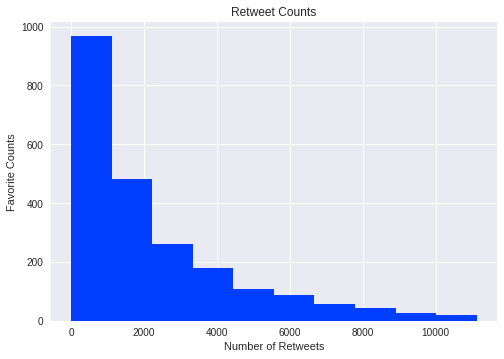

In [92]:
limit = np.nanpercentile(tweet_clean['retweet_count'], 95)
parameter = tweet_clean['retweet_count'] < limit
data = tweet_clean['retweet_count'][parameter]
plt.hist(data, bins = 10, range = [0, limit])
plt.title("Retweet Counts")
plt.xlabel("Number of Retweets")
plt.ylabel("Favorite Counts")
plt.show()

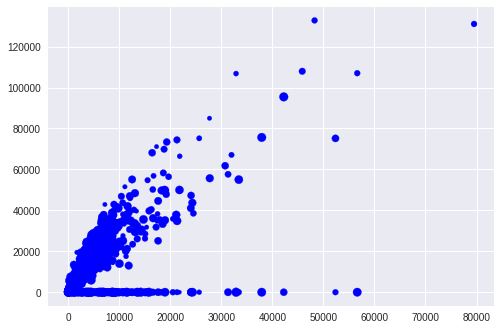

In [91]:
#Using a scatterplot to make confirmations
plt.style.use('seaborn-bright')

# make the data
np.random.seed(3)
x = tweet_clean['retweet_count']
y = tweet_clean['favorite_count']
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

plt.scatter(x, y, s=sizes, c='blue', vmin=0, vmax=100)


plt.show()